In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#READING OF DATA
df = pd.read_csv("height-weight.csv")

In [5]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


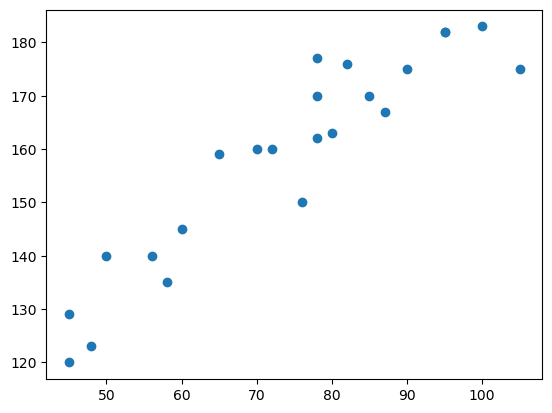

In [6]:
plt.scatter(df.Weight, df.Height)

In [7]:
#divide the data into X, y
X = df[["Weight"]]
y = df["Height"]

In [8]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [10]:
#train -test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [11]:
X_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [12]:
y_train

4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [13]:
#scaling
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [16]:
#train >> fit transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [18]:
X_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [19]:
#model training
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [21]:
reg

LinearRegression()

In [22]:
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
print("The coef is", reg.coef_)
print("The intercept is", reg.intercept_)

The coef is [17.96866211]
The intercept is 159.0


In [24]:
#y_pred = intercept+coef(x)
#159+x_train*17

In [25]:
reg.predict(X_train)

array([152.96309227, 129.08678304, 159.47481297, 163.8159601 ,
       174.66882793, 139.93965087, 169.24239401, 125.83092269,
       161.64538653, 155.13366584, 137.76907731, 161.64538653,
       180.09526185, 190.94812968, 180.09526185, 161.64538653])

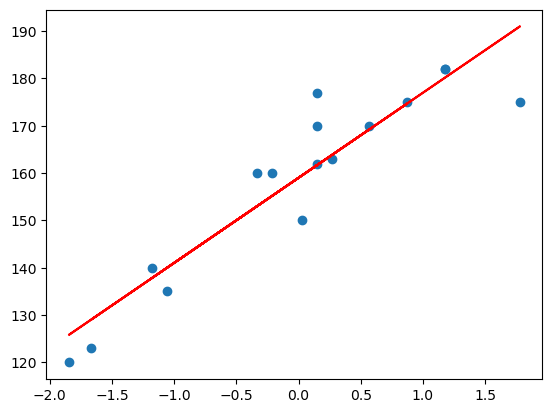

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), 'r')

In [28]:
y_pred_test = reg.predict(X_test)

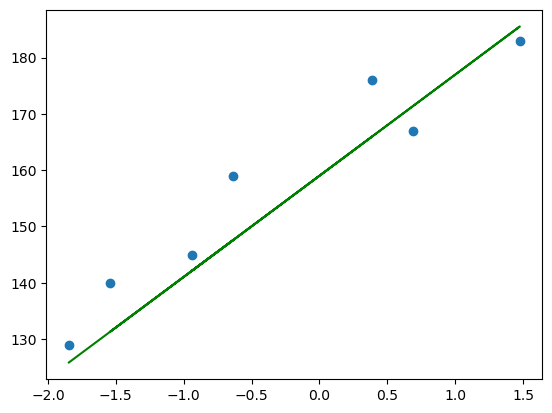

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, 'g')

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
mean_squared_error(y_test, y_pred_test)

50.33408704814381

In [34]:
mean_absolute_error(y_test, y_pred_test)

6.173281083006771

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

7.09465200331516

In [36]:
r2_score(y_test, y_pred_test)#85% of y is explained by X, rquare 0 to 1

0.850577349729853

In [37]:
#adj rsquare = 1-(1-rsq)*N-1/n-p-1

In [38]:
score = r2_score(y_test, y_pred_test)

In [39]:
score

0.850577349729853

In [42]:
X_test.shape[1]

1

In [44]:
1- (1-score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

0.8206928196758236